<img src="./unal.png" align=left width="150" height="150"></img>

$\;$
---

<h2 align="center">SERIES DE TIEMPO</h2>



In [ ]:
!pip install --upgrade pandas

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [4]:
%cd '/content/drive/My Drive/Colab Notebooks/db'
!ls

/content/drive/My Drive/Colab Notebooks/db
covid_19.csv	   Meteorite_Landings.csv  test.csv  test.json	   test.pkl
london_merged.csv  poblacion.csv	   test.hdf  test.parquet  test.xlsx


In [2]:
import pandas as pd
pd.__version__

'1.2.0'

In [17]:
df = pd.read_csv('covid_19.csv')
df.sample(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
18915,18916,04/26/2020,Northern Mariana Islands,US,2020-04-27 02:31:20,14.0,2.0,0.0
43222,43223,06/16/2020,Blekinge,Sweden,2020-06-17 04:33:21,382.0,9.0,0.0
35859,35860,06/05/2020,Virginia,US,2020-06-06 02:33:00,48532.0,1454.0,0.0
64328,64329,07/15/2020,Apurimac,Peru,2020-07-16 04:44:59,668.0,23.0,0.0
12647,12648,04/07/2020,NaN,Italy,2020-04-07 23:11:31,135586.0,17127.0,24392.0
29113,29114,05/25/2020,NaN,Senegal,2020-05-26 02:32:35,3130.0,35.0,1515.0
84936,84937,08/12/2020,NaN,Denmark,2020-08-13 04:29:15,15070.0,621.0,13066.0
25925,25926,05/17/2020,Shanxi,Mainland China,2020-05-18 02:32:21,198.0,0.0,198.0
98006,98007,08/29/2020,Narino,Colombia,2020-08-30 04:28:22,13814.0,493.0,10795.0
77026,77027,08/01/2020,Espirito Santo,Brazil,2020-08-02 04:34:47,83814.0,2566.0,68130.0


In [4]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
print(df.dtypes)
print(list(df))

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object
['SNo', 'ObservationDate', 'Province/State', 'Country/Region', 'Last Update', 'Confirmed', 'Deaths', 'Recovered']


In [5]:
df = df[['ObservationDate',
 'Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered']]
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
98247,2020-08-29,Ukraine,1520.0,25.0,883.0
98248,2020-08-29,Netherlands,1048.0,72.0,0.0
98249,2020-08-29,Mainland China,1277.0,1.0,1268.0
98250,2020-08-29,Ukraine,3155.0,61.0,1837.0


In [6]:
df_time = df.groupby('ObservationDate').sum()    #conociendo el numero de casos cada dia
df_time.head(5)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


In [7]:
df1 = df_time['Confirmed'].iloc[10:15]
df1

ObservationDate
2020-02-01    12038.0
2020-02-02    16787.0
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
Name: Confirmed, dtype: float64

In [8]:
df2 = df_time['Deaths'].iloc[12:17]
df2

ObservationDate
2020-02-03    426.0
2020-02-04    492.0
2020-02-05    564.0
2020-02-06    634.0
2020-02-07    719.0
Name: Deaths, dtype: float64

In [9]:
df1 - df2

ObservationDate
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19455.0
2020-02-04    23400.0
2020-02-05    27072.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

In [10]:
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
...,...,...,...
2020-08-25,23889150.0,819414.0,15570191.0
2020-08-26,24176836.0,825696.0,15794441.0
2020-08-27,24452629.0,831586.0,15997281.0


In [11]:
(34+11)/4

11.25

**Diff** resta cada dia con el dia previo

In [12]:
df_diff = df_time.diff()     #muestra el aumento de casos de cada dia.
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
...,...,...,...
2020-08-25,241773.0,6392.0,232939.0
2020-08-26,287686.0,6282.0,224250.0
2020-08-27,275793.0,5890.0,202840.0


In [13]:
df_time.diff().mean()         #número  promedio de confirmados, muertes y recovered al dia

Confirmed    113617.731818
Deaths         3829.463636
Recovered     74589.677273
dtype: float64

Nótese que tenemos un valor nulo en la primera fila del DataFrame y esto es debido a que la observacion 1 no tiene con quien restarse

In [14]:
df_time.head(1).to_dict()     #to_dict me genera un diccionario de una observacion en este caso

{'Confirmed': {Timestamp('2020-01-22 00:00:00'): 555.0},
 'Deaths': {Timestamp('2020-01-22 00:00:00'): 17.0},
 'Recovered': {Timestamp('2020-01-22 00:00:00'): 28.0}}

In [15]:
df_diff = df_diff.fillna({'Confirmed': 555.0,
 'Deaths': 17.0,
 'Recovered': 28.0})     #esta línea es para remplazar la primera fila por los valores anteriormente especificados

In [16]:
df_diff.cumsum()               #muestra la suma acumulativa

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
...,...,...,...
2020-08-25,23889150.0,819414.0,15570191.0
2020-08-26,24176836.0,825696.0,15794441.0
2020-08-27,24452629.0,831586.0,15997281.0


 ## Filtrar por mes, año en datetime
 
 A continuación se sumará dependiendo del valor categorizado, en este sentido cada mes.

In [17]:
df_diff.resample('M').sum()                  #      '7D' :cada 7dias ,       'W-Sun' :cada domingo,       'M' :cada mes

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9925.0,213.0,222.0
2020-02-29,76088.0,2728.0,39560.0
2020-03-31,771474.0,39166.0,138246.0
2020-04-30,2399359.0,191281.0,836725.0
2020-05-31,2910100.0,138647.0,1626576.0
2020-06-30,4308892.0,139218.0,2711943.0
2020-07-31,7123998.0,168247.0,5015868.0
2020-08-31,7396620.0,162999.0,6040617.0


In [18]:
df_diff.resample('M').count()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,10,10,10
2020-02-29,29,29,29
2020-03-31,31,31,31
2020-04-30,30,30,30
2020-05-31,31,31,31
2020-06-30,30,30,30
2020-07-31,31,31,31
2020-08-31,29,29,29


In [19]:
df_diff.resample('M').mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,992.500000,21.300000,22.200000
2020-02-29,2623.724138,94.068966,1364.137931
2020-03-31,24886.258065,1263.419355,4459.548387
2020-04-30,79978.633333,6376.033333,27890.833333
2020-05-31,93874.193548,4472.483871,52470.193548
2020-06-30,143629.733333,4640.600000,90398.100000
2020-07-31,229806.387097,5427.322581,161802.193548
2020-08-31,255055.862069,5620.655172,208297.137931


In [20]:
df_cum = df_time.resample('12h').sum(min_count=1)     #Analizando con frecuencia de 12horas,       min_count=1 : con almenos un elemento
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-08-27 00:00:00,24452629.0,831586.0,15997281.0
2020-08-27 12:00:00,NaN,NaN,NaN
2020-08-28 00:00:00,24734448.0,837124.0,16198165.0


Una forma de interpolar es mediante: 

* **_df_cum.bfill_**: Extrae el elemento siguiente del valor que estaba nulo y lo remplaza. 
* **_df_cum.fillna_**: Extrae el elemento previo para poder remplazar. 
* **_df_cum.fillna(-1000)_**: Permite remplazar los valores nulos por -1000.

In [21]:
df_cum = df_cum.interpolate()            # coloca un valor medio entre los registros diarios  
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,604.0,17.5,29.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,797.0,22.0,33.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-08-27 00:00:00,24452629.0,831586.0,15997281.0
2020-08-27 12:00:00,24593538.5,834355.0,16097723.0
2020-08-28 00:00:00,24734448.0,837124.0,16198165.0


---
## Tasa de supervivencia al coronavirus

In [22]:
df_cum['rate'] = 1 - df_cum['Deaths']/df_cum['Confirmed']         #Genera una nueva columna que es la tasa de supervivencia del coronavirus

---
## Extrayendo resultados donde los indices no es datatime   ---- Uso de Groupper

In [23]:
df_cum = df_cum.reset_index()
df_cum

,ObservationDate,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
1,2020-01-22 12:00:00,604.0,17.5,29.0,0.971026
2,2020-01-23 00:00:00,653.0,18.0,30.0,0.972435
3,2020-01-23 12:00:00,797.0,22.0,33.0,0.972396
4,2020-01-24 00:00:00,941.0,26.0,36.0,0.972370
...,...,...,...,...,...
436,2020-08-27 00:00:00,24452629.0,831586.0,15997281.0,0.965992
437,2020-08-27 12:00:00,24593538.5,834355.0,16097723.0,0.966074
438,2020-08-28 00:00:00,24734448.0,837124.0,16198165.0,0.966156
439,2020-08-28 12:00:00,24865452.0,839811.5,16303961.0,0.966226


In [24]:
df_cum.groupby(pd.Grouper(key='ObservationDate', freq = 'M'))[['rate']].mean()

,rate
ObservationDate,
2020-01-31,0.974594
2020-02-29,0.973562
2020-03-31,0.960070
2020-04-30,0.936029
2020-05-31,0.933422
2020-06-30,0.945713
2020-07-31,0.957037
2020-08-31,0.964106


A continuación se muestra como se ha comportado la tasa de supervivencia a lo largo del tiempo.

<AxesSubplot:xlabel='ObservationDate'>

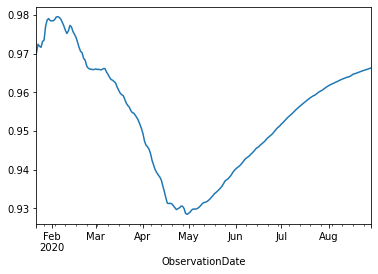

In [25]:
sr = df_cum.groupby(pd.Grouper(key='ObservationDate', freq = '1D'))['rate'].mean()
sr.plot()

<AxesSubplot:xlabel='ObservationDate'>

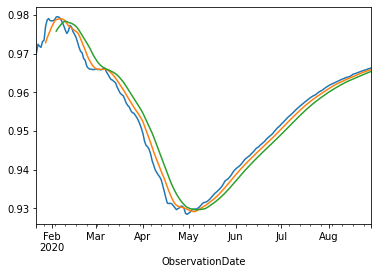

In [35]:
sr.plot()
sr.rolling(window=7).mean().plot()               #rolling me permite hacer promedios con ventanas de frecuencias, aqui de 7dias  (intervalos de 7 y 14 dias)
sr.rolling(window=14).mean().plot()

Se puede observar que al aumentar la ventana, la curva se comienza a suavizar. Miremos como ha ido evolucionando la desviacion estandar de la tasa de supervivencia.

In [36]:
import numpy as np

<AxesSubplot:xlabel='ObservationDate'>

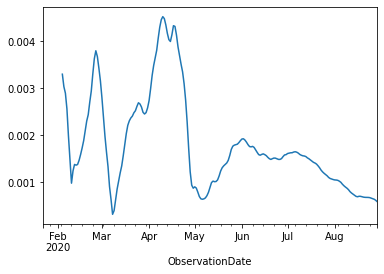

In [37]:
sr.rolling(window=14).apply(lambda x: np.std(x)).plot()

---
## ¿Cuál es el pais con mayor número de contagios?

In [38]:
df.sample(6)

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
83804,2020-08-10,Russia,7469.0,56.0,6175.0
96962,2020-08-28,Peru,2539.0,61.0,0.0
43974,2020-06-17,Spain,17845.0,2945.0,6392.0
47683,2020-06-22,US,65928.0,2648.0,0.0
11889,2020-04-04,Mainland China,18.0,0.0,18.0
34527,2020-06-03,Japan,65.0,1.0,59.0


In [28]:
df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False)

Country/Region
Brazil          801422.0
India           764281.0
US              702038.0
South Africa    622551.0
Russia          405843.0
                  ...   
Gibraltar            1.0
Greenland            1.0
The Bahamas          1.0
The Gambia           1.0
 Azerbaijan          1.0
Name: Confirmed, Length: 223, dtype: float64

Anteriormente se puede identificar que el país con mayor númerod e contagios es **Brasil**

In [29]:
list(df)

['ObservationDate', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']

In [30]:
df_time = df.groupby(['Country/Region',
            pd.Grouper(key='ObservationDate',freq='1D')]).sum()
df_time

Confirmed  Deaths  Recovered
Country/Region                 ObservationDate                              
 Azerbaijan                    2020-02-28             1.0     0.0        0.0
('St. Martin',)                2020-03-10             2.0     0.0        0.0
Afghanistan                    2020-02-24             1.0     0.0        0.0
                               2020-02-25             1.0     0.0        0.0
                               2020-02-26             1.0     0.0        0.0
...                                                   ...     ...        ...
occupied Palestinian territory 2020-03-12             0.0     0.0        0.0
                               2020-03-14             0.0     0.0        0.0
                               2020-03-15             0.0     0.0        0.0
                               2020-03-16             0.0     0.0        0.0
                               2020-03-17             0.0     0.0        0.0

[34081 rows x 3 columns]

Trabajemos con China que es el país donde inició el brote de contagios del coronavirus:

In [31]:
df_china = df_time.loc['Mainland China',:]  #solo China

In [40]:
df_china    #DataFrame quew solo contiene los datos de China

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,547.0,17.0,28.0
2020-01-23,639.0,18.0,30.0
2020-01-24,916.0,26.0,36.0
2020-01-25,1399.0,42.0,39.0
2020-01-26,2062.0,56.0,49.0
...,...,...,...
2020-08-25,84996.0,4634.0,80014.0
2020-08-26,85004.0,4634.0,80044.0
2020-08-27,85013.0,4634.0,80089.0


In [41]:
import matplotlib.pyplot as plt

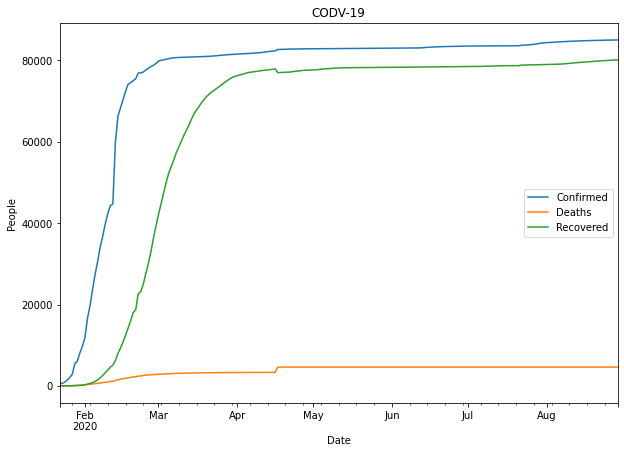

In [42]:
df_china.plot(figsize = (10,7), title = 'CODV-19')    #figsize = (10,7)   : tamaño de la gráfica
plt.xlabel('Date')                                     #colocando nombre a los ejes
plt.ylabel('People')
plt.show()

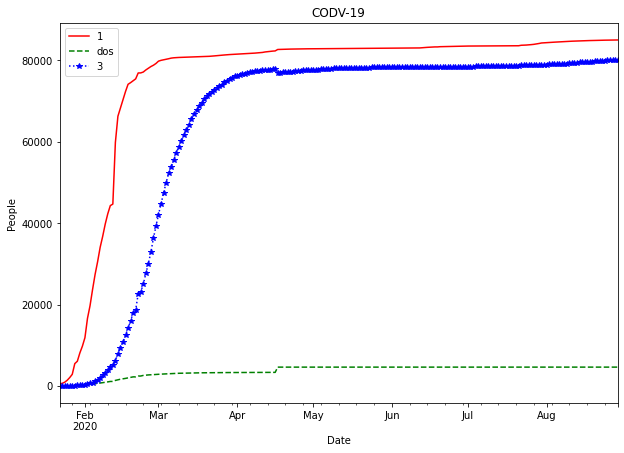

In [43]:
ax = df_china.plot(figsize = (10,7), title = 'CODV-19',
              legend = False,
              style = ['r-','g--','b:*'])     #r-: rojo y linea continua       # g--: verde y linea punteada     #b:* : Azul y figuras de estrellas  
ax.legend(['1','dos','3'])
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

In [44]:
df_monthly = df_china.resample('M').max()
df_monthly

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9783.0,213.0,214.0
2020-02-29,79251.0,2835.0,39279.0
2020-03-31,81524.0,3305.0,76062.0
2020-04-30,82874.0,4633.0,77900.0
2020-05-31,83017.0,4634.0,78307.0
2020-06-30,83534.0,4634.0,78480.0
2020-07-31,84337.0,4634.0,78990.0
2020-08-31,85031.0,4634.0,80151.0


<AxesSubplot:xlabel='ObservationDate'>

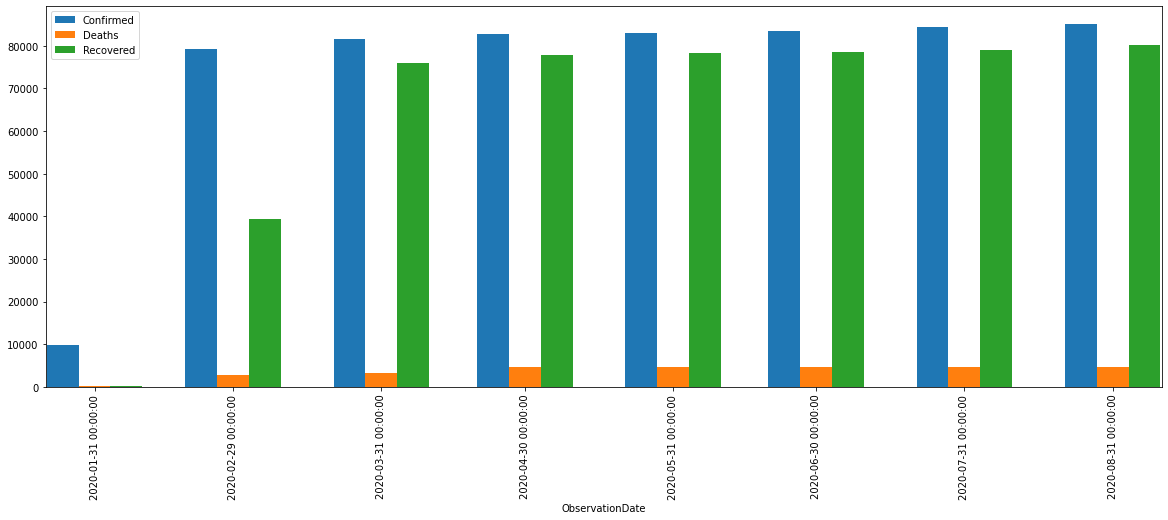

In [62]:
df_monthly.plot(figsize = (20,7), kind='bar', width=20)

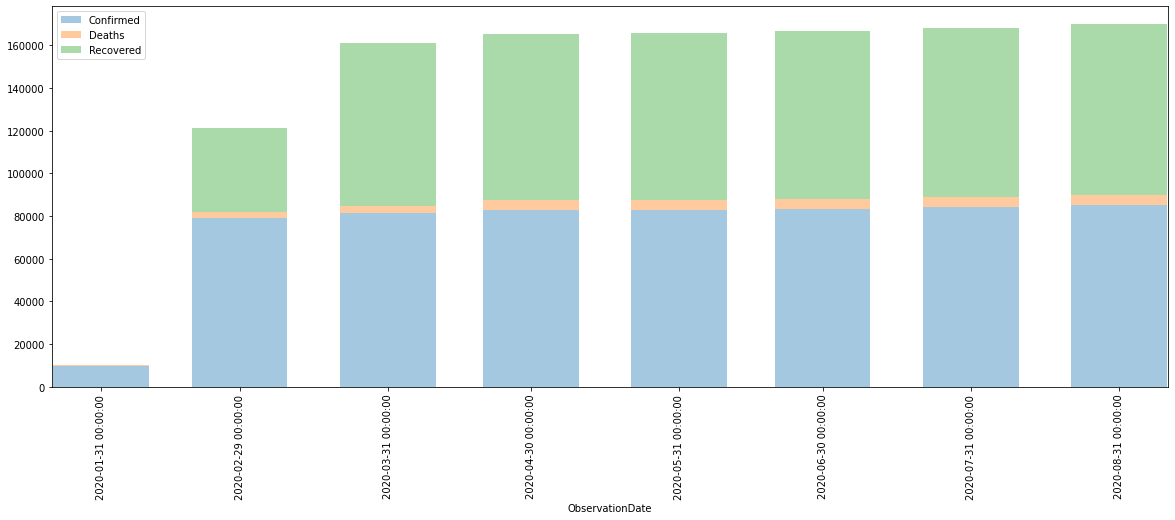

In [65]:
df_monthly.plot(kind = 'bar', 
             stacked = 'True',          # Muestra las barras apiladas
             alpha = 0.4,               # nivel de transparencia
             width = 20,               # Grosor de las barras para dejar espacio entre ellas
             figsize = (20,7));            # Cambiamos el tamaño de la figura

<AxesSubplot:xlabel='ObservationDate'>

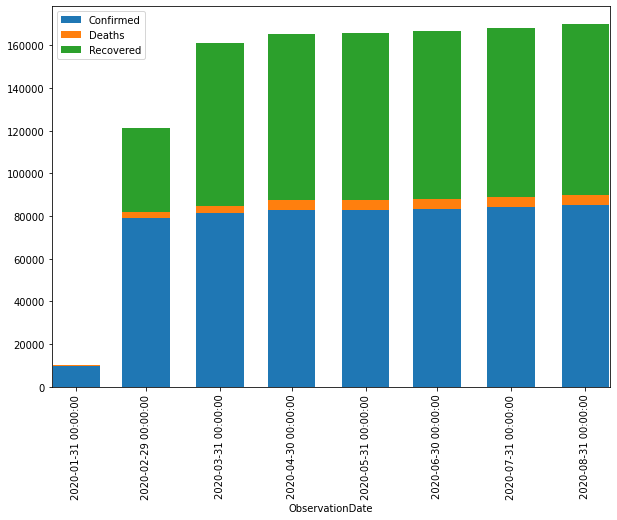

In [61]:
df_monthly.plot(figsize = (10,7), kind='bar', stacked = True, width=20)

Generando una nueva variable sobre personas que no se conoce cual será el tratamiento **Traitment**, son confirmadas y estan en espera.

In [66]:
df_monthly['Traitment'] = df_monthly['Confirmed'] - df_monthly['Deaths']- df_monthly['Recovered']
df_monthly

,Confirmed,Deaths,Recovered,Traitment
ObservationDate,,,,
2020-01-31,9783.0,213.0,214.0,9356.0
2020-02-29,79251.0,2835.0,39279.0,37137.0
2020-03-31,81524.0,3305.0,76062.0,2157.0
2020-04-30,82874.0,4633.0,77900.0,341.0
2020-05-31,83017.0,4634.0,78307.0,76.0
2020-06-30,83534.0,4634.0,78480.0,420.0
2020-07-31,84337.0,4634.0,78990.0,713.0
2020-08-31,85031.0,4634.0,80151.0,246.0


array([<AxesSubplot:ylabel='2020-01-31 00:00:00'>,
       <AxesSubplot:ylabel='2020-02-29 00:00:00'>,
       <AxesSubplot:ylabel='2020-03-31 00:00:00'>,
       <AxesSubplot:ylabel='2020-04-30 00:00:00'>,
       <AxesSubplot:ylabel='2020-05-31 00:00:00'>,
       <AxesSubplot:ylabel='2020-06-30 00:00:00'>,
       <AxesSubplot:ylabel='2020-07-31 00:00:00'>,
       <AxesSubplot:ylabel='2020-08-31 00:00:00'>], dtype=object)

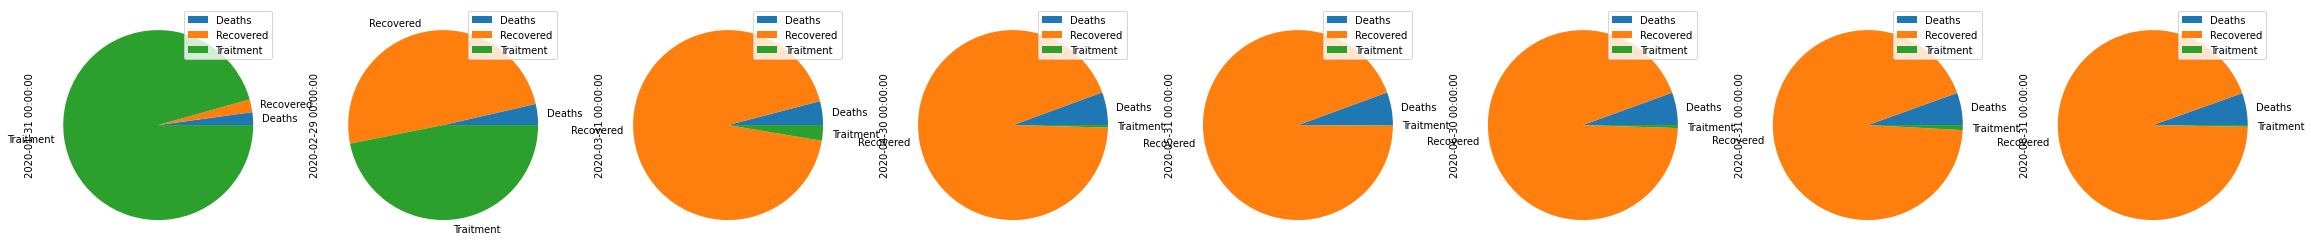

In [78]:
df_monthly[['Deaths', 'Recovered', 'Traitment']].T.plot(figsize = (40,7), kind = 'pie', subplots=True)

<AxesSubplot:>

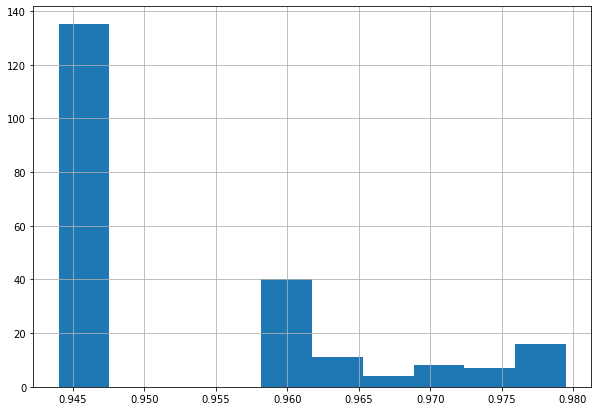

In [79]:
df_china['rate'] = 1- df_china['Deaths']/df_china['Confirmed']    #tasa de supervivencia
df_china['rate'].hist(figsize = (10,7), bins = 10)

<AxesSubplot:ylabel='Density'>

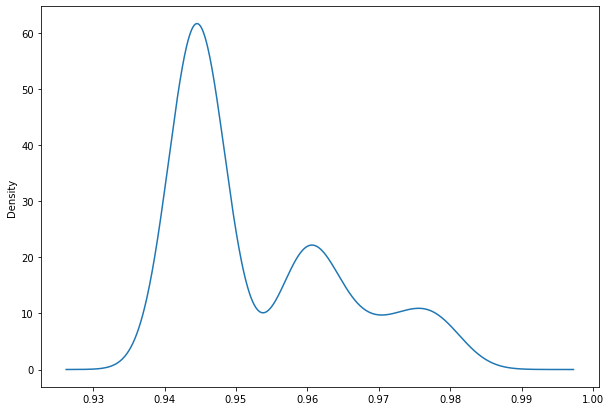

In [80]:
df_china['rate'].plot(kind = 'kde', figsize = (10,7))